In [ ]:
# Start writing code here...from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')


Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

"""
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
"""
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.track_album_release_year = spotify_data_cleaned.track_album_release_year.astype("int64")
"""
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
"""


'\nmask = (spotify_data_cleaned.track_popularity > 0)\nspotify_data_cleaned = spotify_data_cleaned.loc[mask]\n'

In [ ]:
features = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
classe = ["edm", "latin", "pop","r&b","rap","rock"  ]

def quanti(data):
    columns = features
    data_norme = data[columns]
    return data_norme


In [ ]:
def attrib_doublon() :
    spotify_data_cleaned['doublon'] = False
    for i in spotify_data_cleaned.index :
        spotify_data_cleaned['doublon'][i] = spotify_data_cleaned.duplicated(subset ="track_name", keep=False)[i]

attrib_doublon()
spotify_data_cleaned

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_month,track_album_release_year,doublon
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,06,2019,True
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,12,2019,True
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,07,2019,True
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,07,2019,False
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,03,2019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,04,2014,False
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,03,2013,False
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,04,2014,False
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,01,2014,False


In [ ]:
def dedoublons(data):
    return data.drop_duplicates(subset ="track_name",keep = False, inplace=True)

# pour ne pas drop tous les doublons et garder une copie mettre 'first' ou 'last' à Keep

#dedoublons(spotify_data_cleaned) #donne 18468 lignes et permet d'obtenir un bon tree
spotify_data_cleaned

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_month,track_album_release_year,doublon
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,06,2019,True
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,12,2019,True
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,07,2019,True
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,07,2019,False
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,03,2019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,04,2014,False
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,03,2013,False
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,04,2014,False
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,01,2014,False


In [ ]:
def suppression_ambigue() :
    mask_avec = (spotify_data_cleaned.doublon == True)
    spotify_only_doublon = spotify_data_cleaned.loc[mask_avec]
    
    to_delete = []
    for i in spotify_only_doublon.index :
        track = spotify_only_doublon.track_name[i]
        mask_temp = (spotify_only_doublon.track_name == track)
        tab_temp = spotify_only_doublon.loc[mask_temp]
        g = spotify_only_doublon.playlist_genre[i]
        for j in tab_temp.playlist_genre :
            if j != g :
                to_delete.append(i)
    to_delete = list(dict.fromkeys(to_delete))
    for i in to_delete :
        spotify_only_doublon = spotify_only_doublon.drop(i)
    return spotify_only_doublon

def all_non_ambigue() :
    mask_sans = (spotify_data_cleaned.doublon == False)
    spotify_sans_doublon = spotify_data_cleaned.loc[mask_sans]
    
    doublon_non_ambigue = suppression_ambigue()

    songs = pd.concat([spotify_sans_doublon,doublon_non_ambigue])
    return songs

In [ ]:
songs_non_ambigue = all_non_ambigue() 

**on a donc 9945 valeurs ambigues**

In [ ]:
spotify_data_cleaned = songs_non_ambigue

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='playlist_genre', ylabel='count'>

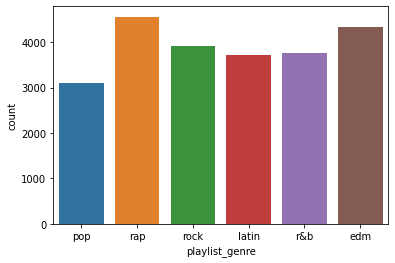

In [ ]:
sns.countplot(spotify_data_cleaned.playlist_genre)


**on peut déduire que les chansons pop sont souvent utilisées dans d'autres playlist et donc considérées comme ambigue**

In [ ]:
data_quanti = quanti(spotify_data_cleaned)

In [ ]:
# nécessaire pour la visualisation stylax
spotify_data_cleaned['playlist_number'] = 10
for i in spotify_data_cleaned.index: 
    if spotify_data_cleaned.playlist_genre[i] == 'edm' :
        spotify_data_cleaned['playlist_number'][i] = 0
    if spotify_data_cleaned.playlist_genre[i] == 'latin' :
        spotify_data_cleaned['playlist_number'][i] = 1
    if spotify_data_cleaned.playlist_genre[i] == 'pop' :
        spotify_data_cleaned['playlist_number'][i] = 2
    if spotify_data_cleaned.playlist_genre[i] == 'r&b' :
        spotify_data_cleaned['playlist_number'][i] = 3
    if spotify_data_cleaned.playlist_genre[i] == 'rap' :
        spotify_data_cleaned['playlist_number'][i] = 4
    if spotify_data_cleaned.playlist_genre[i] == 'rock' :
        spotify_data_cleaned['playlist_number'][i] = 5

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from

In [ ]:
from sklearn.model_selection import train_test_split

X= data_quanti  # Features
y= spotify_data_cleaned.playlist_genre  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6470001425110447


In [ ]:
clf.score(X_test,y_test)

0.6470001425110447

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>